In [150]:
from jbfg.pandas_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
schema = 'l2_kjbk_extnl'

In [152]:
sql = 'select * from products_info'

In [153]:
# 상품정보 데이터 조회
df_products_info = get_df(sql, schema)
df_products_info

,product_id,name,category_id,division_id,category_name,division_name
0,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages
1,20995,Organic Broccoli Florets,116,1,frozen produce,frozen
2,33000,Pure Irish Butter,36,16,butter,dairy eggs
3,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs
4,47144,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...
95,47209,Organic Hass Avocado,24,4,fresh fruits,produce
96,21903,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
97,21137,Organic Strawberries,24,4,fresh fruits,produce
98,13176,Bag of Organic Bananas,24,4,fresh fruits,produce


In [155]:
# 과거 구매 이력 데이터 조회
sql2 = 'SELECT * FROM train_x_past'
# SELECT order_id, cstno, order_number, week_day, order_hour, decode(order_interval,'',0) as order_interval, add_order, is_reordered, product_id FROM train_x_past
# 형변환 고민해보기
df_train_x_past = get_df(sql2, schema)
df_train_x_past.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
1253967,1902783,163819,47,0,19,13.0,2,1,24852
1253968,1969590,163819,42,1,15,6.0,3,1,24852
1253969,2549215,163819,9,1,11,7.0,1,1,24852
1253970,3103211,163819,39,1,14,7.0,3,1,24852
1253971,3207262,163819,8,1,12,7.0,1,1,24852


In [37]:
sql3 = 'select * from train_x_current'
df_train_x_current = get_df(sql3, schema)
sql4 = 'select * from train_y'
df_train_y = get_df(sql4, schema)
sql5 = 'select * from test_x_past'
df_test_x_past = get_df(sql5, schema)
sql6 = 'select * from test_x_current'
df_test_x_current = get_df(sql6, schema)
#df_test_x_current

In [38]:
# products_info
len(df_products_info)-df_products_info.count()

product_id       0
name             0
category_id      0
division_id      0
category_name    0
division_name    0
dtype: int64

In [39]:
len(df_train_x_past)-df_train_x_past.count()

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
dtype: int64

In [40]:
len(df_train_x_current)-df_train_x_current.count()

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
dtype: int64

In [41]:
len(df_train_y)-df_train_y.count()

product_id    0
dtype: int64

In [42]:
len(df_test_x_past)-df_test_x_past.count()

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
dtype: int64

In [43]:
len(df_test_x_current)-df_test_x_current.count()

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
dtype: int64

In [52]:
# 데이터 양이 많으니 테스트 데이터 만들기
len(df_train_x_past)

1253972

In [53]:
def split_test_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [71]:
train_set, x_past_test_set = split_test_data(df_train_x_past, 0.01)
len(x_past_test_set)

12539

In [68]:
len(df_train_x_current)

24424

In [72]:
x_current_train_set, x_current_test_set = split_test_data(df_train_x_current, 0.01)
len(x_current_test_set)

244

In [73]:
y_train_set, y_train_test_set = split_test_data(df_train_y, 0.01)
len(y_train_test_set)

244

In [83]:
# x_past_test_set 4897명 고객들의 과거 구매 이력
# x_current_test_set 234명 고객들의 최근 주문 정보
# y_train_test_set train_y 5,859명 고객들의 최근 주문 상품 (train_x_current의 각 row에 매핑되는 상품 정보)
print("과거 구매 고객 몇명?",len(x_past_test_set['cstno'].unique()))
print("현재 구매 고객 몇명?",len(x_current_test_set['cstno'].unique()))

과거 구매 고객 몇명? 4897
현재 구매 고객 몇명? 234


In [92]:
sql_when = 'select cstno, week_day, count(order_id) from train_x_past group by cstno, week_day order by 3 desc'
df_when = get_df(sql_when, schema)
df_when.tail()

sql_test = 'select * from train_x_past where cstno = "25409" order by week_day desc'
df_test = get_df(sql_test, schema)
df_test

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
0,820692,25409,31,6,18,4.0,2,1,49235
1,1847162,25409,61,5,11,3.0,1,0,45066
2,3370356,25409,15,5,9,4.0,2,1,49235
3,3288547,25409,54,5,10,4.0,1,1,49235
4,3204084,25409,51,5,15,8.0,1,1,49235
...,...,...,...,...,...,...,...,...,...
138,1666330,25409,82,1,16,0.0,7,1,49235
139,1756060,25409,85,1,10,3.0,1,1,13176
140,955348,25409,87,1,10,4.0,2,1,37646
141,2136528,25409,70,1,10,3.0,2,1,5876


In [95]:
sql_max_day = 'select x.*, y.week_day as max_day from train_x_past x , ( select cstno, week_day from ( select cstno, week_day, cnt, row_number() over(partition by cstno order by cnt desc) as rk from (select cstno, week_day, count(order_id) as cnt from train_x_past group by cstno, week_day) a) b where rk = 1 ) y where x.cstno = y.cstno'

In [97]:
df_max_day = get_df(sql_max_day, schema)
df_max_day.tail()

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,max_day
1253967,1902783,163819,47,0,19,13.0,2,1,24852,1
1253968,1969590,163819,42,1,15,6.0,3,1,24852,1
1253969,2549215,163819,9,1,11,7.0,1,1,24852,1
1253970,3103211,163819,39,1,14,7.0,3,1,24852,1
1253971,3207262,163819,8,1,12,7.0,1,1,24852,1


In [140]:
max_day_train_set, max_day_test_set = split_test_data(df_max_day, 0.01)
len(max_day_test_set)

12539

In [103]:
# 결측 데이터 제거
max_day_test_set.isnull().sum()

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
product_id        0
max_day           0
dtype: int64

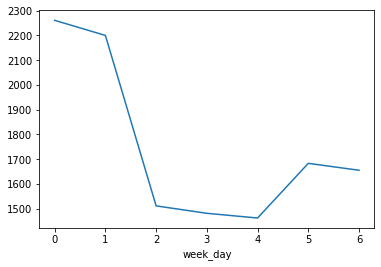

In [104]:
# 요일별 총 거래 횟수 탐색
week_order_series = max_day_test_set.groupby('week_day')['order_id'].nunique()
week_order_series.plot()

In [109]:
# 요일별 구매 상품의 unique한 갯수(상품 거래 다양성 탐색)
# 1, 100 = plt.ylim()
#week_unique_product_series = max_day_test_set.groupby('week_day')['product_id'].nunique()
#week_unique_product_series.plot()

In [118]:
# 고객별 주문횟수 탐색
cstno_unique_order_series = max_day_test_set.groupby('cstno')['order_id'].nunique()
cstno_unique_order_series.describe()

count    4830.000000
mean        2.536853
std         1.607663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: order_id, dtype: float64

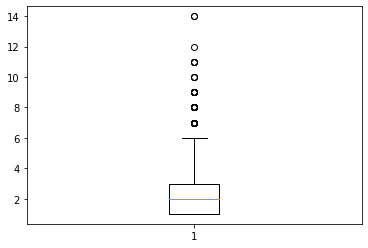

In [119]:
# 고객별 주문횟수 상자 그림 시각화
plt.boxplot(cstno_unique_order_series.values)
plt.show()

In [ ]:
cstno_under_14 = cstno_unique_order_series[cstno_unique_order_series<14].index
max_day_test_set_under_14 = max_day_test_set[max_day_test_set['cstno'].isin(cstno_under_14)]

In [120]:
# 가장 주문이 많은 상품 top 10
max_day_test_set.groupby('product_id')['order_id'].nunique().sort_values(ascending=False)[:10]

product_id
24852    764
13176    698
21137    523
47209    399
21903    398
27845    304
27966    293
47766    234
26209    216
47626    208
Name: order_id, dtype: int64

In [141]:
max_day_test_set.dtypes

order_id          object
cstno             object
order_number      object
week_day          object
order_hour        object
order_interval    object
add_order         object
is_reordered      object
product_id        object
max_day           object
dtype: object

In [145]:
max_day_test_set.astype({'order_number':'int'})
#,'order_interval':float,'add_order':float

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,max_day
337399,723248,73506,49,2,18,7.0,7,1,24838,1
863974,1157628,87242,44,0,9,2.0,4,1,30391,5
705649,472586,115797,44,5,10,5.0,6,1,27966,0
328725,90531,7809,9,3,22,3.0,3,1,9076,6
693936,142331,49902,45,5,16,4.0,5,1,26209,0
...,...,...,...,...,...,...,...,...,...,...
559422,2021961,111788,23,0,13,9.0,25,0,40706,2
702034,3117053,50095,49,6,21,21.0,10,1,24852,6
1102016,1314624,28510,46,4,12,16.0,4,1,24852,1
1157621,1309369,30030,35,0,21,0.0,12,1,31717,0


In [143]:
#형변환에 대한 고민
max_day_test_set.dtypes

order_id          object
cstno             object
order_number      object
week_day          object
order_hour        object
order_interval    object
add_order         object
is_reordered      object
product_id        object
max_day           object
dtype: object